# Support Vector Machine

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import datasets # to use iris dataset from scikit-learn.datasets

In [3]:
iris = datasets.load_iris()

In [4]:
# Use pandas dataframe for visualization
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

print(iris_df.shape)
iris_df.head(-1)

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2


In [5]:
iris_df.shape

(150, 5)

In [6]:
X = iris.data[:, [0, 2]]  # use only sepal length and petal length
y = iris.target

# Binary Classification Task (setosa or not)
y = np.where(y == 0, 0, 1)

In [7]:
print("Data Shape:", X.shape)

Data Shape: (150, 2)


02. Naive SVM
2-4

TO DO

2-3의 결과를 이용해서, (??????)의 빈칸을 채운 후, 간단한 SVM을 직접 구현해봅시다! (편의를 위해 Sepal Length와 Petal Length 2개의 변수만을 이용해 Setosa 여부를 판단하는 Binary Classification 문제로 간주합니다.)

In [10]:
class SimpleSVM:
    def __init__(self, learning_rate=0.001, C=0.0, n_iters=1000):
        self.learning_rate = learning_rate  # 학습률
        self.C = C                          # margin과 training error에 대한 trade-off를 결정하는 하이퍼파라미터
        self.n_iters = n_iters              # 반복 횟수
        self.w = None                       # 가중치 벡터
        self.b = None                       # 편향 값

    def fit(self, X, y):
        n_features = X.shape[1]
        y_ = y * 2 - 1  # 라벨을 -1, 1로 변환

        # 가중치와 편향 초기화
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) < 1
                if condition:
                    self.w = self.learning_rate * (y_[idx] * x_i - 2 * self.C * self.w)
                else:
                    self.w = self.learning_rate * 2 * self.C * self.w
                    self.b = 0

    def predict(self, X):
        approx = np.dot(X,self.w) - self.b
        predictions = np.sign(approx)
        return np.where(predictions == -1, 0, 1)

In [23]:
# Train/Test set split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

C는 margin과 training error에 대한 trade-off를 결정하는 하이퍼파라미터입니다. accuracy를 이용해서 적절한 C를 선택하세요. (기본 C값=0)



In [30]:
# TO DO
C = 0
SVM = SimpleSVM(C=C)

In [31]:
# Model Training
SVM.fit(X_train, y_train)

# Prediction
y_pred = SVM.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM 모델의 정확도: {accuracy * 100:.2f}%")

SVM 모델의 정확도: 20.00%


In [32]:
# Meshgrid function
def make_meshgrid(x, y, h=0.01):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Countour function
def plot_contours(ax, model, xx, yy, **params):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

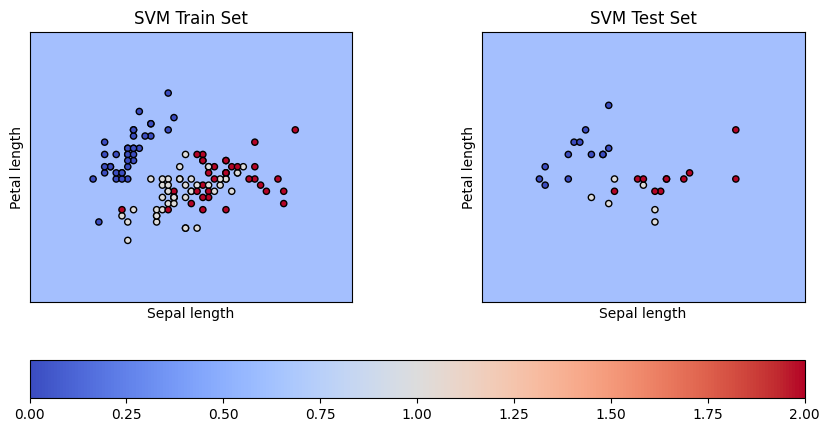

In [33]:
# Contour plot
fig, sub = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

titles = ['SVM Train Set', 'SVM Test Set']
datasets = [(X_train, y_train), (X_test, y_test)]

for (X_set, y_set), title, ax in zip(datasets, titles, sub.flatten()):
    plot_contours(ax, SVM, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    scatter = ax.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Petal length')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

fig.colorbar(scatter, ax=sub, orientation='horizontal')
plt.show()

# PCA

03. Kernel PCA
직접 Linear PCA와 Kernel PCA의 차이를 시각화해서 살펴보도록 하겠습니다. 구현의 편의를 위해 여기서부턴 라이브러리가 지원하는 SVM을 사용합니다!

03번 Section에서는 별도로 수정할 코드가 없습니다. 직접 실행해보고 결과를 확인해보세요!

한가지 주의할 사항은 C 변수는 hyperparameter로, 해당 parameter를 잘 조정하여야 SVM의 성능을 높일 수 있다는 점입니다.

In [34]:
X = iris.data[:, :2]
y = iris.target

In [35]:
C = 1   # SVM의 regularization parameter

clf = svm.SVC(kernel="linear", C=C)
clf.fit(X,y)

y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 15, 35]])

In [36]:
# LinearSVM
clf_linear = svm.LinearSVC(C=C, max_iter=1000)
clf_linear.fit(X, y)

y_pred = clf_linear.predict(X)
confusion_matrix(y, y_pred)

array([[49,  1,  0],
       [ 2, 30, 18],
       [ 0,  9, 41]])

참고: LinearSVC와 SVC의 linear kernel을 사용하는 것은 loss function에 있어 약간의 차이가 존재한다고 합니다.

In [37]:
# RBF KernelPCA
clf_rbf = svm.SVC(kernel='rbf', gamma=0.7, C=C, max_iter=1000)   # gamma: scale parameter
clf_rbf.fit(X, y)

y_pred = clf_rbf.predict(X)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 37, 13],
       [ 0, 13, 37]])

In [38]:
# Polynomial KernelPCA
clf_pol = svm.SVC(kernel='poly', degree=3, gamma='auto', C=C, max_iter=1000)
clf_pol.fit(X,y)

y_pred = clf_pol.predict(X)
confusion_matrix(y, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


array([[50,  0,  0],
       [ 0, 31, 19],
       [ 0, 13, 37]])

In [39]:
C = 1.0
models = (clf, clf_linear, clf_pol, clf_rbf)
models = (clf.fit(X, y) for clf in models)

# plot title 형성
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


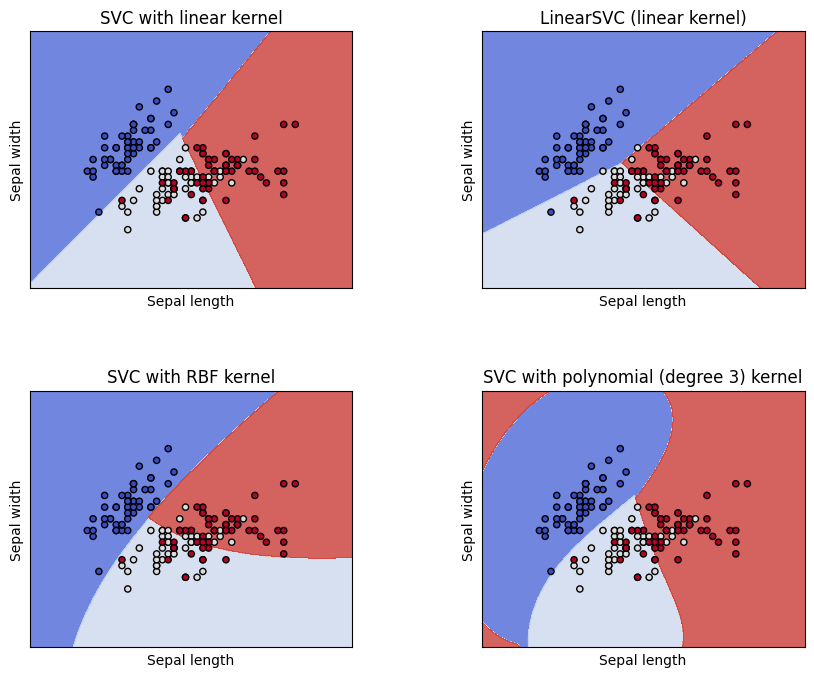

In [40]:
fig, sub = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

PCA Reconstruction
MNIST Classification via PCA Reconstruction

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [42]:
# Load MNIST Dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.values.astype(np.float32)
y = mnist.target.astype(int)

In [43]:
print("Data Shape:", X.shape) # Data Shape
print("Label Shape:", y.shape) # Label Shape

Data Shape: (70000, 784)
Label Shape: (70000,)


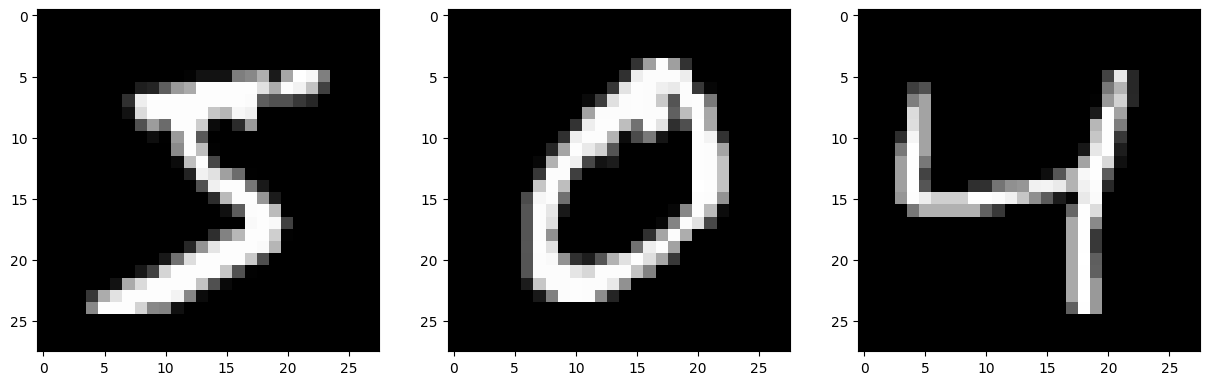

In [44]:
# Data Visualization
plt.figure(figsize=(15, 5))

for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.imshow(X[i].reshape(28, 28), cmap='gray')

plt.show()

In [45]:
# Dataset pre-process: Normalization
def normalize_data(X):
    mean = np.mean(X, axis=1, keepdims=True)
    std = np.std(X, axis=1, keepdims=True)
    std[std == 0] = 1 # Avoid division by zero
    X_normalized = (X - mean) / std
    return X_normalized

X_normalized = normalize_data(X)

In [46]:
# Split into train/test set
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=2024)


In [47]:
# Check train/test set
print("Train Dataset Shape:", X_train.shape)
print("Test Dataset Shape:", X_test.shape)

Train Dataset Shape: (49000, 784)
Test Dataset Shape: (21000, 784)


In [48]:
# Split train dataset into each labels
label_datasets_train = {label: X_train[y_train == label] for label in range(10)}

label_datasets_train[0].shape

(4815, 784)

Basic PCA
TO DO

본 문제에서는 PCA 라이브러리가 아닌, numpy를 이용한 행렬 단위 연산을 통해 PCA 함수를 직접 구현하고자 합니다.

In [67]:
def compute_pca(X, n_components):
    """
    Performs Principal Component Analysis (PCA) on the input data X.

    Parameters:
    - X: A numpy array of shape (N, F), where N is the number of samples and F is the number of features.
    - n_components: An integer specifying the number of principal components to retain.

    Returns:
    - selected_eigenvectors: A numpy array of shape (F, n_components), containing the top principal components as columns.
    - explained_variance: A numpy array of shape (n_components,), showing the explained variance ratio for the selected components.
    """
    selected_eigenvectors = np.zeros((X.shape[1], n_components))
    explained_variance = np.zeros(n_components)
    covariance_matrix = np.cov(X.T)
    #### TO DO ####
    # Hint1: np.linalg.eigh
    # Hint2: 위의 함수를 통해 고윳값 분해를 하면, eigenvalues와 eigenvectors가 나오는데,
    # 여기서 eigenvalues들은 오름차순이나 내림차순이 아닙니다. 따라서 np.argsort 같은 함수를 통해 sorting을 해야합니다.

    X_centered = X - np.mean(X, axis=0)

    # Compute the covariance matrix
    covariance_matrix = np.cov(X_centered.T)

    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top n_components eigenvalues and corresponding eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :n_components]
    selected_eigenvalues = sorted_eigenvalues[:n_components]

    # Calculate the explained variance
    total_variance = np.sum(sorted_eigenvalues)
    explained_variance = selected_eigenvalues / total_variance


    ###############
    return selected_eigenvectors, explained_variance


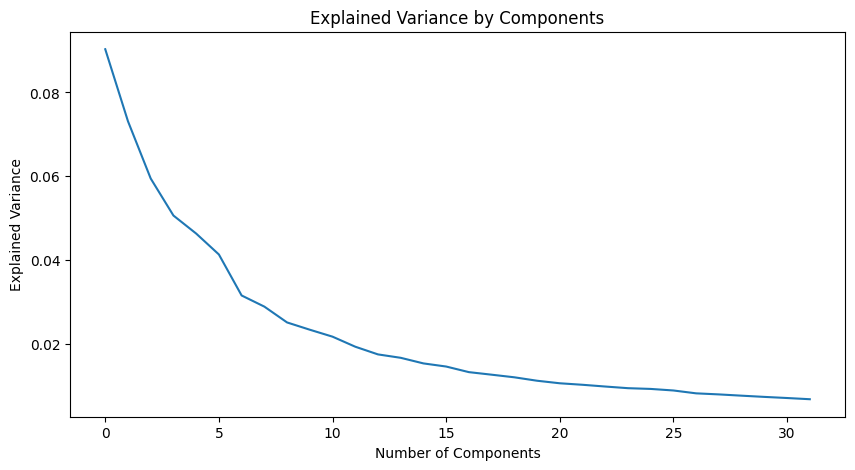

In [68]:
# Example
pca_example1, explained_variance1 = compute_pca(X_train, 32)
plt.figure(figsize=(10, 5))
plt.plot(explained_variance1)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Components')
plt.show()

PCA Reconstruction
아래와 같이 PCA 기반으로 MNIST 데이터셋의 Dimension을 낮추고, 다시 복원하는 과정을 진행할 수 있습니다.

Original Image와 Reconstructed Image의 시각화에서 살펴볼 수 있듯, Reconstructed Image가 Original과 상당한 유사도를 갖게 됨을 확인할 수 있습니다.

label_datasets_train의 idx와 해당 데이터셋 안에서의 idx값, principal component의 개수를 다양하게 바꿔보면서 실험해보세요!

In [69]:
# PCA Calculation for label 0 dataset
pca_example2, explained_variance2 = compute_pca(label_datasets_train[0], 32)

In [77]:
# Reconstruction error function (Inverse of PCA)
def pca_reconstruction(X, eigenvectors):
    """
    Reconstructs the input data X using the provided eigenvectors and calculates the reconstruction error.

    Parameters:
    - X: A numpy array of shape (N, F), where N is the number of samples and F is the number of features.
    - eigenvectors: A numpy array of shape (F, n_components), containing the principal components.

    Returns:
    - X_reconstructed: A numpy array of shape (N, F), representing the reconstructed input data.
    - error: A numpy array of shape (N,), containing the mean squared reconstruction error for each sample.
    """
    X_reconstructed = X.copy()
    error = np.zeros(X.shape[0])
    #### TO DO ####
    # Hint1: 아래 (N, n_components) shape의 X_pca를 이용하세요.
    # Hint2: error는 X와 X_reconstructed를 비교하면 됩니다.
    X_pca = np.dot(X, eigenvectors)

    X_reconstructed = np.dot(X_pca, eigenvectors.T)
    error = np.mean((X - X_reconstructed) ** 2, axis=1)

    ###############
    return X_reconstructed, error

In [78]:
reconstructed_example2, error2 = pca_reconstruction(label_datasets_train[0], pca_example2)


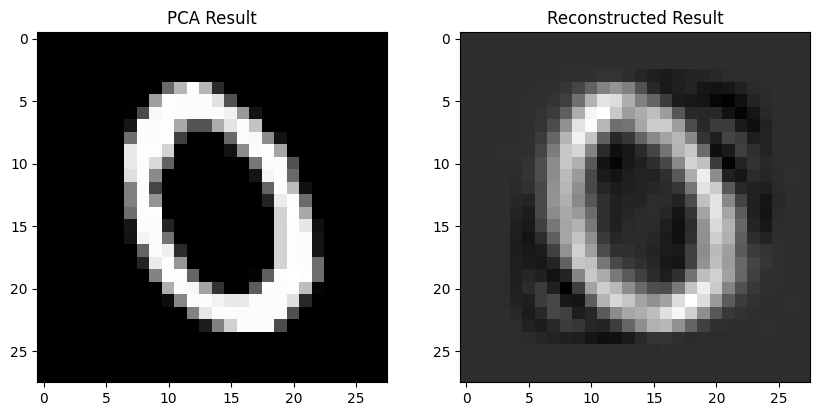

In [79]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(label_datasets_train[0][0].reshape(28, 28), cmap='gray')
plt.title('PCA Result')

plt.subplot(2, 2, 2)
plt.imshow(reconstructed_example2[0].reshape(28, 28), cmap='gray')
plt.title('Reconstructed Result')

plt.show()

주어진 n_components_list에 다양한 Principal Component의 수를 적용하면서 Reconstruction 결과를 확인해보세요!

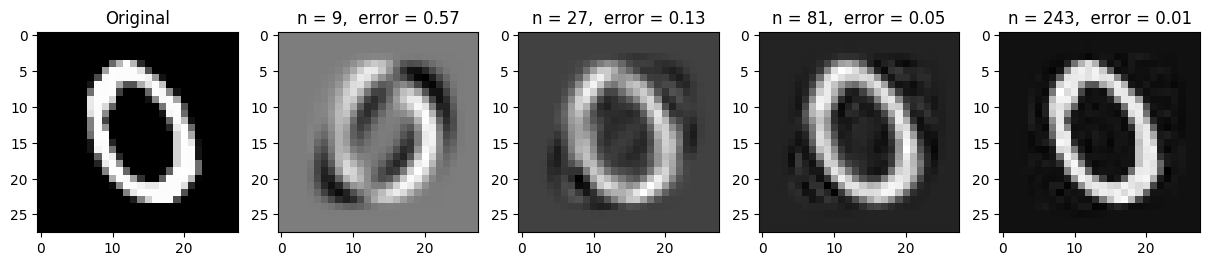

In [80]:
n_components_list = [9, 27, 81, 243]

fig, axs = plt.subplots(1, len(n_components_list) + 1, figsize=(15, 5))

# Original image
axs[0].imshow(label_datasets_train[0][0].reshape(28, 28), cmap='gray')
axs[0].set_title('Original')

for i, n_components in enumerate(n_components_list):
    pca_example, explained_variance = compute_pca(label_datasets_train[0], n_components)
    reconstructed_example, error = pca_reconstruction(label_datasets_train[0], pca_example)

    axs[i+1].imshow(reconstructed_example[0].reshape(28, 28), cmap='gray')
    axs[i+1].set_title(f'n = {n_components},  error = {error[0]:.2f}')

plt.show()

5. MNIST Classification via PCA Reconstruction Error
앞서 #4에서 살펴본 Reconstruction Error에 대해 다시 생각해보겠습니다.

MNIST 데이터셋을 기준으로, Label이 0인 데이터셋에 대해 Principal Component를 구했다고 해봅시다.

구한 Principal Component를 이용해 Reconstruction을 진행한다면, 1에 대한 데이터와 0에 대한 데이터 중 무엇이 Error가 더 낮을까요?

Principal Component를 구하는 과정에서 사용한 Label에서 훨씬 Error가 낮기에, 이점을 이용해서 Classification Task를 수행해 볼 수 있습니다.

In [81]:
# PCA on each label
n_components = 60
label_pcas = {}
for label in range(10):
    label_pcas[label], _ = compute_pca(label_datasets_train[label], n_components)

In [82]:
# Prediction function
def predict_label(X, label_pcas):

    predicted_labels = []
    errors = np.zeros((X.shape[0],10)) # (N, 10)
    for label in range(10):
        _, error = pca_reconstruction(X, label_pcas[label]) #(N,)
        errors[:,label] = error
    predicted_labels = np.argmin(errors, axis=1) #(N,)

    return predicted_labels

In [83]:
predicted_labels = predict_label(X_test, label_pcas)

# Compute accuracy
accuracy = np.mean(np.array(predicted_labels) == y_test)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Accuracy on test set: 92.87%


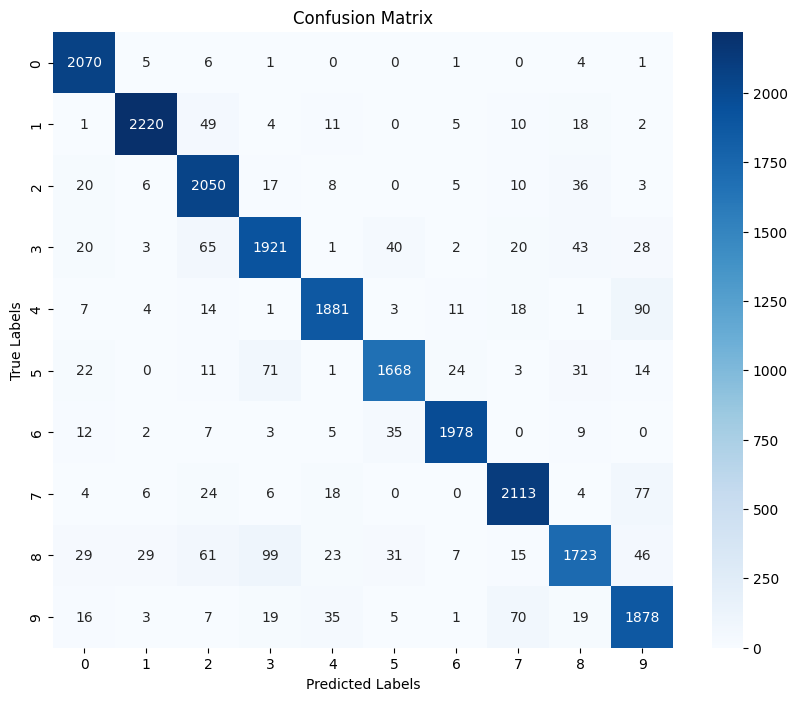

In [84]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Confusion Matrix Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

6. Your Work!
앞서 수행한 reconstruction error based classification에 다양한 n_components를 적용해 볼 수 있습니다.

다양하게 n_components들을 변경해보세요!

In [85]:
n_components_list = [5, 25, 125] # [4,16,64]와 같이 자유롭게 변경해 보세요!
accuracy_list = []

for n_components in n_components_list:
    label_pcas = {label: compute_pca(label_datasets_train[label], n_components)[0] for label in range(10)}
    predicted_labels = predict_label(X_test, label_pcas)
    accuracy = np.mean(np.array(predicted_labels) == y_test)
    accuracy_list.append(accuracy)

    print(f"Accuracy with {n_components} components: {accuracy * 100:.2f}%")


Accuracy with 5 components: 78.45%
Accuracy with 25 components: 81.29%
Accuracy with 125 components: 91.21%


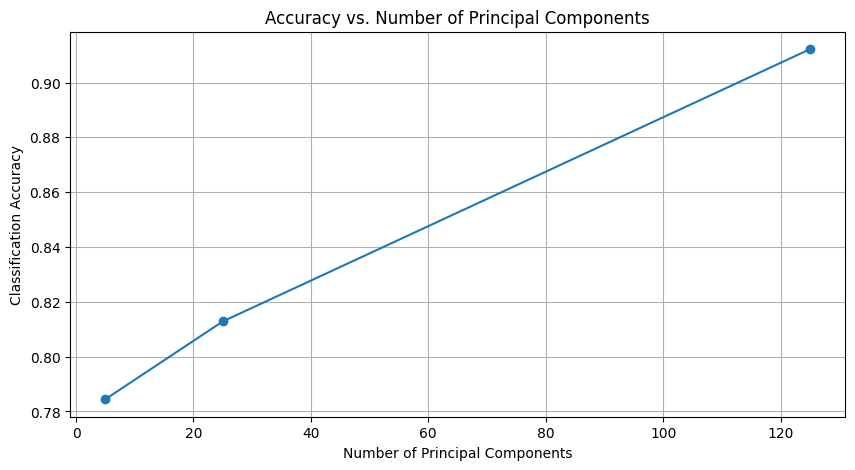

In [86]:
plt.figure(figsize=(10, 5))
plt.plot(n_components_list, accuracy_list, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Classification Accuracy')
plt.title('Accuracy vs. Number of Principal Components')
plt.grid(True)
plt.show()

Q. Prinicpal Component의 수와 classification의 정확도 사이에 어떤 상관관계가 있는지 자유롭게 설명해보세요.

A. PCA에서 더 많은 주성분을 사용할수록 기존 데이터의 정보를 더 많이 보존할 수 있는 것 같습니다. 그리고 주성분의 수를 너무 줄일 경우 데이터의 중요 정보 손실될 가능성이 있으며 최종적으로 모델의 예측력이 낮아질 것 같습니다. 한편, PCA를 통해 차원 축소하면 모델의 overfitting를 방지할 수 있습니다.

###K-Means
Data Compression Using K-means Clustering

In [1]:
# Google colab을 사용하시는 분들은 아래의 주석을 제거하여 해당 셀을 실행해주신 후 진행하시면 됩니다.
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import pairwise_distances

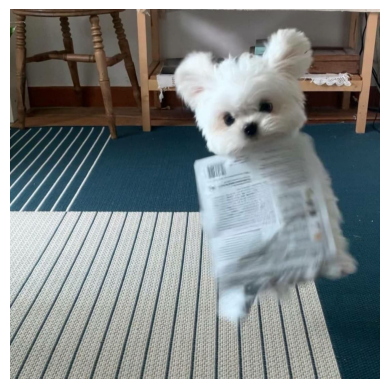

In [4]:
image_path = '/content/mydrive/MyDrive/doggy.jpeg' # 안된다면 절대 경로로 바꿔주세요!

plt.imshow(Image.open(image_path))
plt.axis('off')
plt.show()


해당 과제를 위해 필요한 function들

In [5]:
def read_image(image_path):
    image = Image.open(image_path)
    arr = np.array(image)
    arr_flatten = arr.reshape(-1, arr.shape[-1])
    return arr_flatten.astype(float) / 255. , arr.shape

def reconstruct_image(labels, centroids, image_shape):
    segmented_image = centroids[labels].reshape(image_shape)
    return (segmented_image * 255.).astype(np.uint8)

02. Implement EM Algorithm with K-means clustering
EM Algorithm with K-means clustering은 다음과 같은 과정으로 이루어집니다. 각 단계는 별도의 함수로 정의하여 구현할 예정입니다.

(1) Random하게 K개의 중심점(centroids) 설정

먼저 데이터 공간에서 K개의 클러스터 중심점을 무작위로 설정합니다. 이 작업은 initialize_centroids 함수에서 처리됩니다.

(2) E-step (클러스터 할당)

각 데이터 포인트를 가장 가까운 중심점에 할당하는 단계입니다. 이를 통해 데이터 포인트가 어느 클러스터에 속하는지를 결정합니다. 이 과정은 assign_clusters 함수로 구현됩니다.

(3) M-step (중심점 업데이트)

각 클러스터에 속하는 데이터 포인트들의 평균을 계산하여 새로운 중심점을 업데이트합니다. 이 과정은 update_centroids 함수에서 수행됩니다.

(4) 수렴(convergence)까지 Step 2, 3 반복

E-step과 M-step을 반복하여 중심점의 변화가 일정 기준 이하로 작아질 때까지 알고리즘을 수행합니다. 이 과제에서는 따로 구현하지는 않습니다.

이 과정은 최종적으로 kmeans 함수로 구현되며, 각 단계는 개별 함수로 정의되어 모듈화된 형태로 구현됩니다. (kmeans function 참고)

(1) Random하게 K개의 중심점(centroids) 설정

먼저 데이터 공간에서 K개의 클러스터 중심점을 무작위로 설정합니다.

In [6]:
def initialize_centroids(X, n_clusters):
    random_indices = np.random.choice(X.shape[0], n_clusters, replace=False)
    centroids = X[random_indices]
    return centroids

TO DO

(2) E-step (클러스터 할당) 을 수행하는 assign_clusters 함수와

(3) M-step (중심점 업데이트) 을 수행하는 update_centroids 를 구현하세요.



In [8]:
def assign_clusters(X, centroids):
    """
    Assigns each data point in X to the nearest centroid based on the pairwise distances.

    Parameters:
    - X: A numpy array of shape (N, 3), where N is the number of samples and 3 is RGB.
    - centroids: A numpy array of shape (n_clusters, 3), where n_clusters is the number of clusters and 3 is RGB.

    Returns:
    - labels: A numpy array of shape (N,), containing the index of the nearest centroid for each sample.
    """
    labels = np.zeros(X.shape[0])
    #### TO DO ####
    # Hint1: pairwise_distances
    distances = np.stack([
        np.sum((X - centroids[i]) ** 2, axis=1)
        for i in range(len(centroids))
    ], axis=1)

    labels = np.argmin(distances, axis=1)

    ###############
    return labels


In [9]:
label = np.array([1,0,1,1,0])

X = np.array([1,2,3,4,5])

y = X[np.where(label == 1)]

y

array([1, 3, 4])

In [10]:
def update_centroids(X, labels, n_clusters):
    """
    Updates centroids by calculating the mean of all data points assigned to each cluster.

    Parameters:
    - X: A numpy array of shape (N, 3), where N is the number of samples and 3 is RGB.
    - labels: A numpy array of shape (N,), containing the cluster assignments for each sample.
    - n_clusters: An integer representing the number of clusters.

    Returns:
    - new_centroids: A numpy array of shape (n_clusters, 3), where n_clusters is the number of clusters and 3 is RGB.
    """
    new_centroids = np.zeros((n_clusters, 3))
    #### TO DO ####
    new_centroids = np.stack([np.mean(X[labels == i], axis=0)
                              for i in range(n_clusters)], axis=0)
    ###############
    return new_centroids

EM Algorithm with K-means clustering



In [11]:
def kmeans(X, n_clusters, n_iters=20):
    centroids = initialize_centroids(X, n_clusters)

    for _ in range(n_iters):
        labels = assign_clusters(X, centroids)
        centroids = update_centroids(X, labels, n_clusters)

    return centroids, labels

03. Data Compression Using K-means Clustering

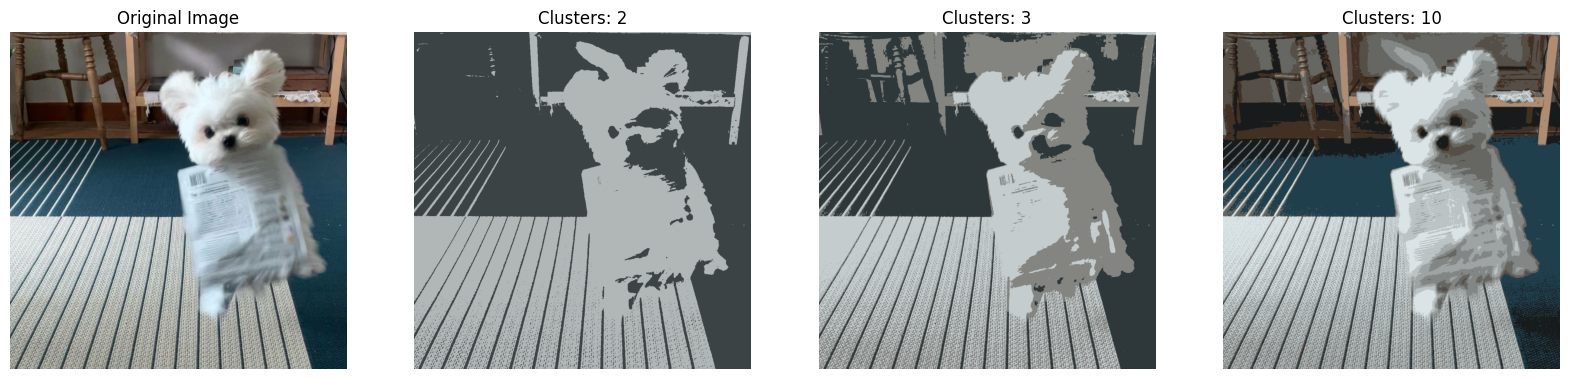

In [12]:
image, image_shape = read_image(image_path)
n_clusters_list = [2, 3, 10]

np.random.seed(2025)
fig, axes = plt.subplots(1, len(n_clusters_list) + 1, figsize=(20, 5))

axes[0].imshow(Image.open(image_path))
axes[0].axis('off')
axes[0].set_title('Original Image')

for i, n_clusters in enumerate(n_clusters_list):
    centroids, labels = kmeans(image, n_clusters)
    segmented_image = reconstruct_image(labels, centroids, image_shape)
    axes[i + 1].imshow(segmented_image)
    axes[i + 1].axis('off')
    axes[i + 1].set_title(f'Clusters: {n_clusters}')

plt.show()

Q. 위의 결과를 통해 관찰할 수 있는 사실은 무엇인가요?

A. 클러스터의 개수가 적을수록 흑백 사진에 가까워지고, 많아질수록 컬러 사진에 가까워진다. Feature의 개수가 많을수록 사진이 더 명확하게 표현이 되며, feature 개수가 적을수록 최소한의 특징적 분류를 할 수 있음을 볼 수 있는 것 같습니다.